## 1. Introduction:

**Midterm report in brief**:

I'd planned to do a clustering & correlational analysis of economic indicators & climate(temperature & precipitation) data of various countries. <br>

The idea was to find which developmental indicators are most impacted by climate change.

**Changes in Midterm plan**:

However, as i'll mention this again in the assignment, gathering reliable climate(temperature & precipitation) data (Years 1975-2019 for 45 countries) wasn't possible. Hence, i modified my project accordingly. Thus, instead i focussed on only possible indicators (Features) for which i was able to collect reliable & continous data (Years 1975-2019 for 45 countries).


**Old objective**:

The idea was to find some results that could be a help for policy-makers. As climate change happens to be an existential issue of our times, i thought of finding some important results linking climate change & economical indicators.

**New objectives**:

New objective is to explore the **Correlation between different economic indicators that go under the radar of normal policymaking dictums**. These Correlations can be thought as **'Surprising'** (i.e. Either they don't follow the conventional logic or nobody expects them to be related). I'll also try to find some Correlations that are **'normal'**(i.e. They do follow the conventional logic & they're expected to be related). I'll also try to model these interdependencies using some **SVM, Neural Network & K-Neighbour Classifier**.

## 2. & 3. Design & Results:
<br>

I used only one source to get the mentioned data:

i) **Economic Indicators**: https://databank.worldbank.org/home.aspx

**Data Description**:

i) I gathered data for **45** countries:<br><br> **Argentina <br> Australia <br> Brazil <br> China <br> France <br> Germany <br> India <br> Indonesia <br> Italy <br>
Japan <br>
Korea, Rep. <br> Mexico <br>
Netherlands <br>
Russian Federation <br>
Saudi Arabia <br>
Spain <br>
Switzerland <br>
Turkey <br>
United Kingdom <br>
United States <br>
Bangladesh <br>
Greece <br>
Israel <br>
Ireland <br>
Malaysia <br>
Norway <br>
Thailand <br>
Portugal <br>
Philippines <br>
Kenya <br>
Iceland <br>
Fiji <br>
European Union <br>
Austria <br>
Caribbean small states <br>
Canada <br>
Chile <br>
Colombia <br>
Denmark <br>
Cyprus <br>
Greenland <br>
Guatemala <br>
Hong Kong SAR, China <br>
Pakistan <br>
Sweden <br>**

ii) I gathered data for the years in the range **(1975-2019)**

iii) I gathered data for the following features: <br><br>
    **Country Code,<br>
    Year, <br>
    Expense (% of GDP), <br>
    Exports of goods and services (% of GDP), <br>
    External balance on goods and services (% of GDP), <br>
    "Foreign direct investment, net inflows (% of GDP)", <br>
    "Foreign direct investment, net outflows (% of GDP)", <br>
    GDP growth (annual %), <br>
    "Services,  value added (% of GDP)", <br>
    Tax revenue (% of GDP),<br>
    Trade (% of GDP), <br>
    Merchandise trade (% of GDP), <br>
    "Government expenditure on education,  total (% of GDP)", <br>
    Gross capital formation (% of GDP), <br>
    Gross domestic savings (% of GDP), <br>
    Forest rents (% of GDP), <br>
    Current account balance (% of GDP), <br>
    Current health expenditure (% of GDP), <br>
    "Agriculture, forestry, and fishing, value added (% of GDP)", <br>
    Access to electricity (% of population), <br>
    Agricultural land (% of land area), <br>
    "Agriculture, forestry, and fishing, value added (annual % growth)", <br>
    Total greenhouse gas emissions (% change from 1990)**<br>


**NOTE**: All features were or have been converted into percentage. So they've been already pre-processed.
___

**NOTE**: Most difficult part of the assignment was to assemble a new dataset. As the idea was totally ingenuous & original with no pre-existing data-set, i had to assemble a totally original & new data-set myself. <br>

Although i used the world-bank database to get the appropriate features, but it wasn't so simple. The task of getting a good number of features for '45' countries & as old as of year '1975' was extremenly difficult. <br>

Many times a  feature i wanted to have in my data-set had missing missing links for either country or any particular year. Hence the goal to capture random feature's data of 1975-2019 for 45 countries simultaneously wasn't easy.<br>

Assembling an original data-set was the most difficult thing & took my most of time. It required lots of data processing (using python, Google sheets, etc) which can't be shown in the assignment. <br>

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
# Reading data-set
d1 = pd.read_csv('d1.csv')

# Dataframe
d1

,Country Code,Year,Expense (% of GDP),Exports of goods and services (% of GDP),External balance on goods and services (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",GDP growth (annual %),"Services, value added (% of GDP)",Tax revenue (% of GDP),...,Gross capital formation (% of GDP),Gross domestic savings (% of GDP),Forest rents (% of GDP),Current account balance (% of GDP),Current health expenditure (% of GDP),"Agriculture, forestry, and fishing, value added (% of GDP)",Access to electricity (% of population),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (annual % growth)",Total greenhouse gas emissions (% change from 1990)
0,ARG,1975,56.628904,5.824052,-0.154621,0.106010,0.008557,-0.028412,43.274768,72.375308,...,29.441047,29.286216,0.156207,1.372533,85.636455,6.583910,80.268849,47.009343,-2.747213,56.142179
1,ARG,1976,45.872596,9.175388,3.253892,0.478175,0.003014,-2.018252,40.954084,28.722115,...,30.729440,33.983232,0.161684,1.272242,18.737410,8.152171,77.340109,46.963302,4.719644,73.927682
2,ARG,1977,49.601880,9.615892,2.289498,0.253606,-0.001761,6.934148,44.106656,91.746278,...,30.941689,33.231187,0.166456,1.983058,42.014703,8.087142,58.219336,46.917261,2.444911,9.123348
3,ARG,1978,31.193963,8.608390,2.892984,0.430420,-0.039599,-4.506125,46.397953,52.170807,...,27.800160,30.693147,0.172823,3.195434,55.450725,7.504427,42.670653,46.871220,2.784402,23.342216
4,ARG,1979,40.435033,6.510915,0.181146,0.297463,-0.085196,10.222763,48.175598,32.433793,...,25.856769,26.037966,0.246366,-0.740769,14.332617,7.796277,98.945229,46.825179,2.863842,33.589562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,SWE,2015,32.157039,43.766768,3.809721,2.030143,2.949914,4.489282,65.303758,27.136842,...,24.428690,28.238410,0.215032,3.316169,10.797142,1.449558,100.000000,7.463112,3.117330,6.018487
2021,SWE,2016,31.989809,42.691478,3.062311,3.033481,0.246681,2.070593,65.467626,28.120505,...,24.715387,27.777698,0.231942,2.356979,10.840467,1.398744,100.000000,7.442734,-1.580362,10.480591
2022,SWE,2017,31.666729,43.734722,2.534694,5.183581,7.357673,2.567925,65.088904,28.127385,...,25.724710,28.259404,0.190709,2.973830,10.785922,1.443538,100.000000,7.416955,5.820802,6.263693
2023,SWE,2018,31.714394,45.683062,2.234925,-0.171455,2.306996,1.950023,65.226396,27.909147,...,26.008397,28.243322,0.255644,2.621667,10.898501,1.392683,100.000000,7.387494,-10.146144,0.417770


In next part, i calculate the Correlation b/w different features of the data-set. I further plot this Correlation matrix. This will help in further analyzing the data-set.

In [3]:
# Calculate Correlation b/w different features of the data-set
d = d1.corr(method='pearson')

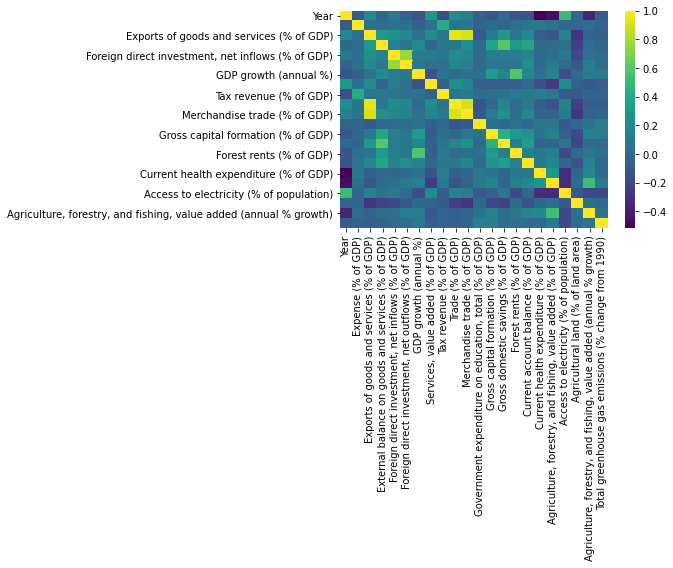

In [4]:
# Plot the Correlation matrix on a heatmap
sn.heatmap(d, annot=False, cmap="viridis")
plt.show()

I used **'pearson'** method to compute correlation.<br>

As you can see, most of the features don't carry any Correlation with other features (i.e. Dark colour defines low correlation). <br>

However, there are still some of them that might carry some correlation with one or more features (i.e. Yellow colour defines higher correlation). <br>

Now i'll print the actual correlation values. The actual values will help us to get an idea of the actual correlation rather than depending upon a 'heatmap' plot. <br>

It'll also provide us very good insights & confirm some of the common hypothesis in the world.

In [5]:
# Also print the Correlation data. It helps to know the actual values of the matrix in order to get an understanding of the data.
print(d)

                                                        Year  \
Year                                                1.000000   
Expense (% of GDP)                                 -0.092697   
Exports of goods and services (% of GDP)            0.198555   
External balance on goods and services (% of GDP)  -0.001236   
Foreign direct investment, net inflows (% of GDP)   0.089129   
Foreign direct investment, net outflows (% of GDP) -0.036941   
GDP growth (annual %)                              -0.123848   
Services, value added (% of GDP)                    0.285135   
Tax revenue (% of GDP)                             -0.154181   
Trade (% of GDP)                                    0.217925   
Merchandise trade (% of GDP)                        0.136623   
Government expenditure on education, total (% o... -0.041207   
Gross capital formation (% of GDP)                 -0.104156   
Gross domestic savings (% of GDP)                   0.005119   
Forest rents (% of GDP)                 

As you can obserbve, most of the features have almost negligible (or random) correlation with other features.

However, still we can find some interesting results from the above values.
For example, there are some features with:

In [26]:
# 'Exports of goods and services'
d.iloc[2,:]

Year                                                                 0.198555
Expense (% of GDP)                                                   0.055697
Exports of goods and services (% of GDP)                             1.000000
External balance on goods and services (% of GDP)                    0.304669
Foreign direct investment, net inflows (% of GDP)                    0.247729
Foreign direct investment, net outflows (% of GDP)                   0.198349
GDP growth (annual %)                                                0.055206
Services, value added (% of GDP)                                     0.202817
Tax revenue (% of GDP)                                               0.081286
Trade (% of GDP)                                                     0.937239
Merchandise trade (% of GDP)                                         0.903759
Government expenditure on education, total (% of GDP)               -0.100128
Gross capital formation (% of GDP)                              

**1) strong positive correlation:**

**i) 'Exports of goods and services' & 'Merchandise trade' & 'External balance on goods and services' & 'Trade' :**

The above result does make sense in real life, as we know form some basic knowledge of 'Economics' that Countries with strong 'External balance' (i.e. Trade Surplus) generally carry Good Manufacturing capacity (either Quantitatively in major developing economies, etc or Qualitatively in developed economies). Hence, these economies generally Trade more (Higher 'Trade (% of GDP)') & most of times trade in 'Goods' rather than 'Services' (Higher 'Merchandise trade (% of GDP)'). There can be many examples like China, India when considering developing economies. On other hand there are also many developed countries like Japan, Taiwan, Switzerland with Trade surplus. Developing economies focus on anything they can manufacture, both low-tech (Garments, Metallurgy, Basic Engineering goods) & High-Tech. On other hand, Developed economies focus on manufacturing Hi-Tech Exports like Semi-conductors, Robotics, Bio-Tech, etc.

In [27]:
# 'FDI Inflow'
d.iloc[4,:]

Year                                                                 0.089129
Expense (% of GDP)                                                   0.053023
Exports of goods and services (% of GDP)                             0.247729
External balance on goods and services (% of GDP)                    0.146342
Foreign direct investment, net inflows (% of GDP)                    1.000000
Foreign direct investment, net outflows (% of GDP)                   0.765675
GDP growth (annual %)                                                0.111671
Services, value added (% of GDP)                                     0.106036
Tax revenue (% of GDP)                                               0.076505
Trade (% of GDP)                                                     0.225029
Merchandise trade (% of GDP)                                         0.187366
Government expenditure on education, total (% of GDP)                0.014314
Gross capital formation (% of GDP)                              

**2) Mild positive correlation:**

**i) 'FDI Inflow' & 'Foreign direct investment, net outflows ' & 'Export of goods & services':**

This correlations also makes sense as we know that countries that attract higher FDI's tend to export more as countries as they end up creating extra manufacturing capacity due to FDI inflow. However, This is not always true especially in 2 situations - a) When FDI outfow is also huge & country might end up as FDI deficit OR b) majority of FDI inflow is directed towards Services, which have a lower exporting potential in comparison to Goods. Also, we know that countries work on a give & take principal, where FDI inflow in generally followed by the recepient country investing in other countries (i.e. FDI outflow).

In [28]:
# 'Year'
d.iloc[0,:]

Year                                                                 1.000000
Expense (% of GDP)                                                  -0.092697
Exports of goods and services (% of GDP)                             0.198555
External balance on goods and services (% of GDP)                   -0.001236
Foreign direct investment, net inflows (% of GDP)                    0.089129
Foreign direct investment, net outflows (% of GDP)                  -0.036941
GDP growth (annual %)                                               -0.123848
Services, value added (% of GDP)                                     0.285135
Tax revenue (% of GDP)                                              -0.154181
Trade (% of GDP)                                                     0.217925
Merchandise trade (% of GDP)                                         0.136623
Government expenditure on education, total (% of GDP)               -0.041207
Gross capital formation (% of GDP)                              

**3) Mixed (Negative & Positive) correlation:****

**i) 'Year', 'access to electricity', 'Agriculture, forestry, and fishing, value added (% of GDP)':**

There was some positive correlation b/w 'year' & 'access to electricity'. This make sense as during the recent years more & more people have been able to enjoy fuits ('access to electricity') of fast development & growth. Electricity is more cheaper & accesible throught out the wold in comparison to 40-50 years ago.<br>

There was some Negative correlation b/w 'years', 'Agriculture, forestry, and fishing, value added (% of GDP)'. This makes sense as due rapid industrialization of the world, share of Agriculture in GDP has been greatly reduced in favour of Manufacturing & Services. For example, in 1947 (when India gots its independence from the British rule) share of Agriculture sector in Indian GDP was 55%. This has been reduced to 10% today, with services sector generating most wealth (55%). In case of China, it's Manufacturing sector that has replaced Agriculture.

In [31]:
# 'Total greenhouse gas emissions'
d.iloc[21,:]

Year                                                                -0.080524
Expense (% of GDP)                                                  -0.036353
Exports of goods and services (% of GDP)                            -0.059285
External balance on goods and services (% of GDP)                   -0.020831
Foreign direct investment, net inflows (% of GDP)                    0.016332
Foreign direct investment, net outflows (% of GDP)                   0.014227
GDP growth (annual %)                                                0.093973
Services, value added (% of GDP)                                    -0.076903
Tax revenue (% of GDP)                                              -0.024760
Trade (% of GDP)                                                    -0.060553
Merchandise trade (% of GDP)                                        -0.016650
Government expenditure on education, total (% of GDP)                0.119877
Gross capital formation (% of GDP)                              

**4) Mild negative correlation:**

**i) 'Total greenhouse gas emissions', 'access to electricity':**

In the era of 'Black Gold' (i.e. Oil Age), negative correlation b/w 'Total greenhouse gas emissions', 'access to electricity' make all sense. During the past 40-50 years, countries had no other option other than to depend upon 'Fossil Fuels' to meet their energy goals. Those whole could produce more energy to meet demand & supply, end up emitting more greenhouse gases.

In [32]:
# 'GDP Growth'
d.iloc[6,:]

Year                                                                -0.123848
Expense (% of GDP)                                                  -0.041105
Exports of goods and services (% of GDP)                             0.055206
External balance on goods and services (% of GDP)                    0.203153
Foreign direct investment, net inflows (% of GDP)                    0.111671
Foreign direct investment, net outflows (% of GDP)                   0.088606
GDP growth (annual %)                                                1.000000
Services, value added (% of GDP)                                    -0.130810
Tax revenue (% of GDP)                                               0.059549
Trade (% of GDP)                                                    -0.000543
Merchandise trade (% of GDP)                                         0.044693
Government expenditure on education, total (% of GDP)                0.045394
Gross capital formation (% of GDP)                              

**5) Surprising correlation:**

**i) 'GDP Growth' & 'Forest rents (% of GDP)':**

This was one of the surprising result that both features had a good correlation with each other & the logic was not so common or easy to understand. But on some greater pondering, i realized that this result do make some sense. Countries with large Forest rents (% of GDP) are generally low-income or LDC (Least Developed countries) that with very less popuplation. Hence they tend to remain un-industrialized. But we also know that like a small baby, small economies (LDC) tend to grow much faster that their developed counterparts (i.e. Growth rate is higher). For example, USA average growth rate for a 20 Trillion USD economy is around 2-3%, on other hand a small country in Africa might have a 10+ GDP growth rate. Also in USA, Forest Rents are a small fraction of the total GDP. But that same African country might be wholly dependent upon its forests supplying natural resources.

In [34]:
# 'Year'
d.iloc[0,:]

Year                                                                 1.000000
Expense (% of GDP)                                                  -0.092697
Exports of goods and services (% of GDP)                             0.198555
External balance on goods and services (% of GDP)                   -0.001236
Foreign direct investment, net inflows (% of GDP)                    0.089129
Foreign direct investment, net outflows (% of GDP)                  -0.036941
GDP growth (annual %)                                               -0.123848
Services, value added (% of GDP)                                     0.285135
Tax revenue (% of GDP)                                              -0.154181
Trade (% of GDP)                                                     0.217925
Merchandise trade (% of GDP)                                         0.136623
Government expenditure on education, total (% of GDP)               -0.041207
Gross capital formation (% of GDP)                              

**5) Surprising correlation:**

**ii) 'Year', 'Health expenditure (% of GDP)':**

In times of 'COVID', this was another interesting result to ponder about. There was a negative correlation b/w 'Year', 'Health expenditure (% of GDP)'. This means that with increasing years, share of 'Health expenditure' in GDP has been greatly reduced. Thus, importance of Health as a serious issue has been reduced in the eyes of policy makers. However we can't think of the same in the Post-COVID world, where health infrastructure will be of great importance.

Thus apart from future hypothesis, this result does makes sense. With bigger scientific breakthroughs in the domain of Health sciences, State's ability to tackle Health-care became more throught out the years. Thus due to complacency, state's started allocating more resources to other needs in comparison to Health. However, we don't know whether this trend will continue to in future or not.

___

**Principal Components Analysis (PCA)** : Not all of the features carry(contribute) same amount of information to the data-set & model. Some of them play all important role in finding the optimal classification model & some them contribute nothing (almost similar to noise). 

Hence PCA searches for the Principal components (Eigenvectors) with the maximum variance for the projection of data-points. These Eigenvectors define the axis for the embedded information in the data set & Eigenvalue of the Eigenvector defines the intensity (level) of contribution to the the embedded information in the data set. Hence, Eigenvectors are ranked on the basis of their Eigenvalues. Bigger Eigenvalue means important feature axis.


**Thus, PCA can reduce the 'Dimensionality' of the data-set, so that it only carries usefull data. We can further use this dimensionally reduced data-set in place of original data-set. But i'll not be using reduced data-set for this project as it might divert the actual purpose of the project.**

___
I also calculated **PCA model** & printed **Principal components (eigenvalues)** for the training data-set:

In [141]:
# PCA
model = PCA()
model.fit(X_train)
print('Principle components: ',model.components_)

Principle components:  [[ 4.85206425e-02  1.98493513e-02  3.65111027e-01  4.21143533e-02
   6.75105562e-02  6.29775967e-02  2.40103213e-03  6.24949720e-02
   3.16377949e-02  6.85910870e-01  5.83735723e-01 -5.69462289e-02
   8.48263548e-03  4.33689611e-02  4.10523856e-02 -5.54734479e-02
  -4.97529389e-02  1.11534376e-01 -9.28002597e-02 -2.57104227e-02
  -5.80369064e-02]
 [-1.23333939e-01  2.25104937e-02  3.54985334e-02  2.25443416e-02
   3.02280876e-02  5.51535075e-02  2.97368049e-02 -7.26362734e-02
   5.99037524e-02  4.97045112e-02  1.27770181e-01  1.30916705e-01
   4.96492205e-02  2.41205331e-02  6.91792792e-02  2.65300584e-01
   2.02168311e-01 -3.96128363e-01 -2.51083462e-02  1.60957147e-01
   7.93933193e-01]
 [ 1.92207934e-01 -1.03209825e-01 -1.70686515e-02 -2.55269680e-02
  -9.60006517e-03 -4.21997426e-02 -1.43805114e-02  7.92480692e-02
  -1.40102525e-01 -1.91240799e-02 -6.38972928e-02  3.54732088e-03
  -1.55982238e-02 -9.87939494e-03 -1.04338044e-01 -5.69611863e-01
  -2.60242152e-

Now i'll plot **'SCREE'** Graph.

As you can observe that first **2-5 Principal components** dominate the spectrum. Hence, they carry most of the information embedded in the data-set.

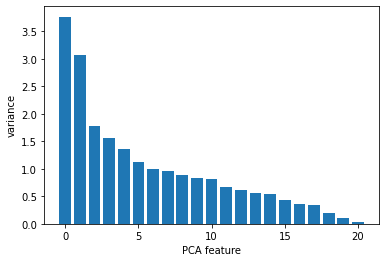

In [142]:
# Calculate variance in Principal components
scaler = StandardScaler()
pca = PCA()
pca_process = make_pipeline(scaler,pca)
pca_process.fit(X_train)

# Plotting Principal components & their variance
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

**Seaborn Pairplot:**

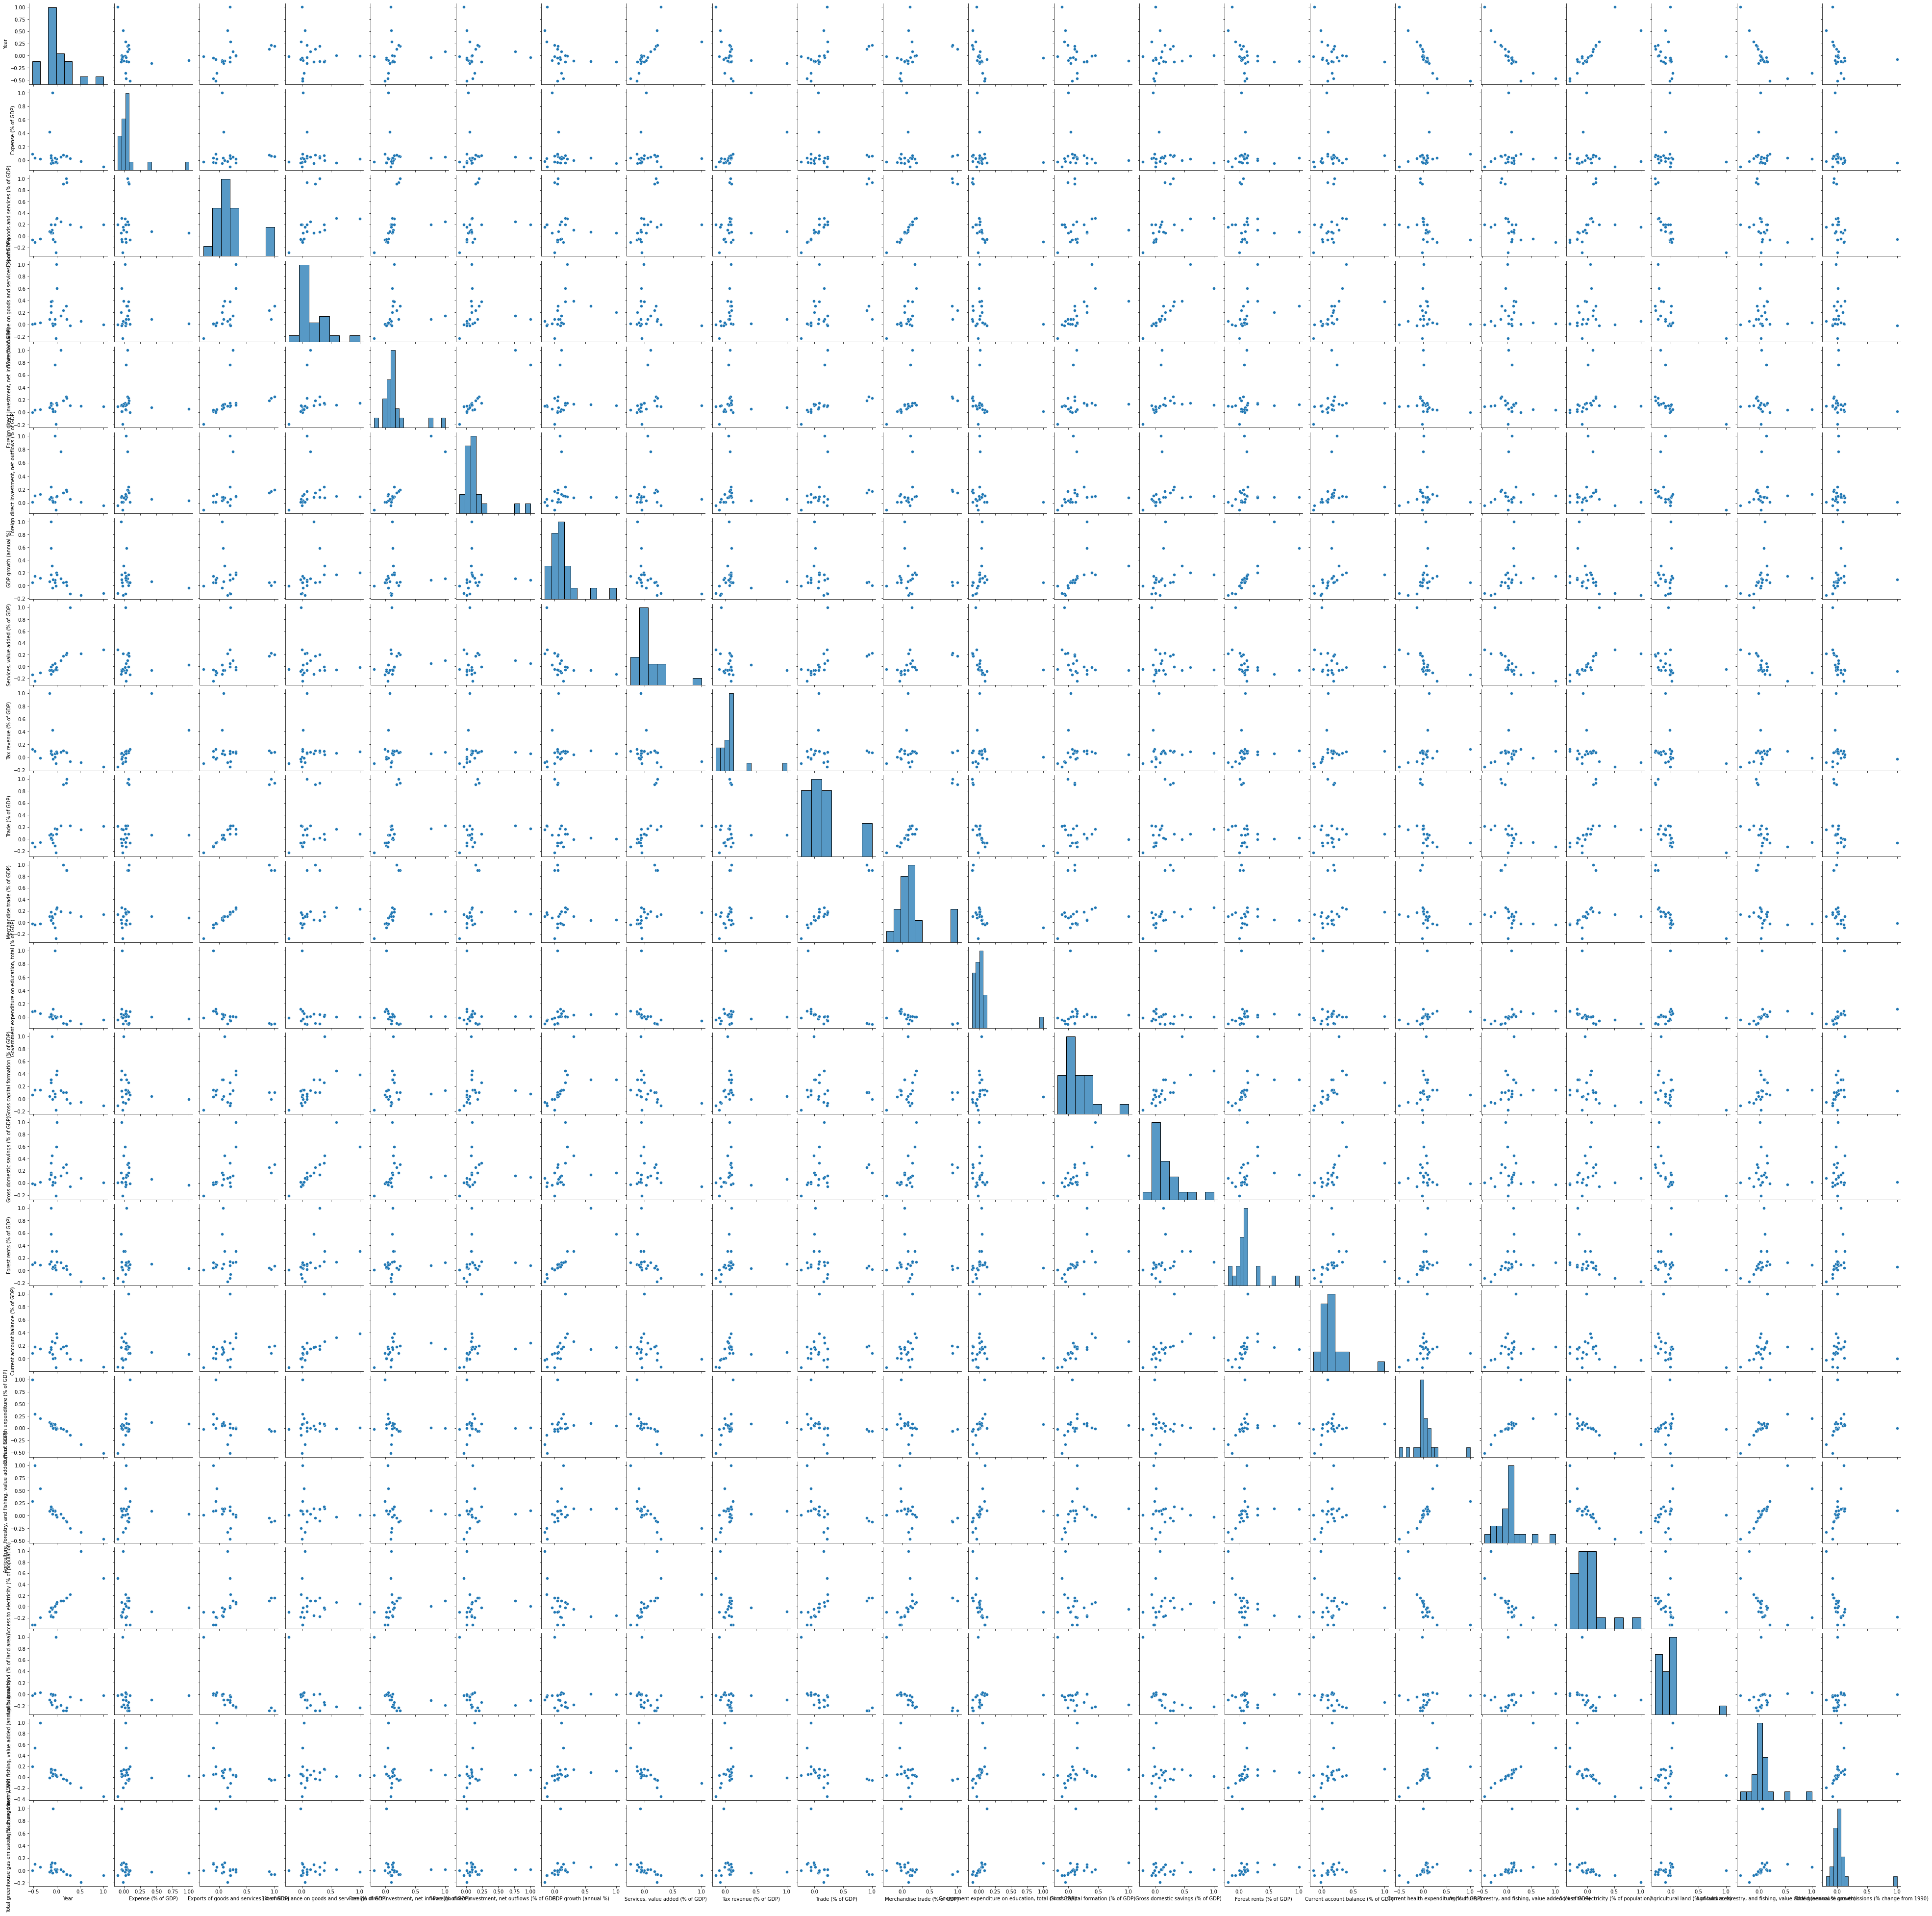

In [144]:
sn.pairplot(d)

In [145]:
# Utility functions to handle Categorical features for future use
def encode_input(X_train, X_test):
    ei = OrdinalEncoder()
    ei.fit(X_train)
    train = ei.transform(X_train)
    test = ei.transform(X_test)
    return train, test

def encode_output(y_train, y_test):
    eo = LabelEncoder()
    eo.fit(y_train)
    train = eo.transform(y_train)
    test = eo.transform(y_test)
    return train, test

**Support Vector Machine (SVM)**: SVM transforms the linearly un-separable data to the higher dimensions, where data can be linearly separated using **'Hyperplane'**. It uses the concept of **'maximizing the Margin'** (i.e. separation b/w the Hyperplane & the nearest data points). This margin is defined by all equidistant **'Support Vectors'** (i.e. perpendicular vector from the nearest data points to the hyperplane.) This is the plain vanila SVM. 

However, we derive more complicated versions of SVM like **'Soft-Margin SVM' & 'Multi-class SVM'**. Soft margin SVM provides for some scope of violations by the data points by providing flexible margins. Multi-class SVM transforms the simple SVM in order to make it work for the case where output has more than one labels. <br>

Next i'll define SVM with the help of equations: <br>

The **Primal** problem of SVM (Soft Margin):

\begin{array}{c}
\operatorname{minimise}_{\vec{\xi}, \vec{w}} \vec{w}^{\top}\cdot \vec{w}+C \sum_{i=1}^{N} \xi_{i} \\
\text { subject to } y_{i} \cdot ( \vec{w}^{\top} \vec{x}_{i}+b) \geq 1-\xi_{i}, \text { for } i=1, \cdots, N \\
\quad \xi_{i} \geq 0
\end{array}

Next we can get the **Dual** of the primal by using the concept of Langrangian Convex optimization method:

$$\mathcal{L}(w, b, \xi, \alpha, r)=\frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N} \xi_{i}-\sum_{i=1}^{N} \alpha_{i}\left(y_{i}\left(w^{T} x_{i}+b\right)+\xi_{i}-1\right)-\sum_{i=1}^{N} r_{i} \xi_{i}$$
<br>

$$Langrangian \ multipliers = \alpha,r$$
<br>
Now we can use the concept of differentiation to & solve the Dual (which is easier to solve). Also, we know that to find the minima of the primal, we need to find the maxima of the dual. <br>

After that we'll get: <br>
$$\mathcal{L}(w, b, \xi, \alpha, r)=\frac{1}{2}\|w\|^{2} -\sum_{i=1}^{N} \alpha_{i}\left(y_{i}\left(w^{T} x_{i}+b\right)-1\right)$$

$$=\sum_{i=1}^{N} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j} x_{i}^{T} x_{j}$$

Now we can easily solve the Dual to get the values of 'w' & 'b'. Hence define the 'Hyperplane'. <br>

___
___

Next i'll train **SVM (Support Vector Machine)** on the given data for different features as Y_train & Y_test: <br><br>

i) **with 'Forest rents (% of GDP)' as output**<br>
ii) **with 'Country Code' as output**<br>
iii) **with 'Total greenhouse gas emissions (% change from 1990)' as output**<br>
iv) **with 'Merchandise trade (% of GDP)' as output**<br>

In [35]:
# Loading & splitting data for the 'Forest rents (% of GDP)' as output
x_train=d1.drop(labels=['Forest rents (% of GDP)','Country Code'],axis=1)
y_train=d1['Forest rents (% of GDP)'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


# Initialize SVM
clf = svm.SVC()

# Train SVM
clf.fit(X_train, Y_train)

# Predict on Testing set
y_pred = clf.predict(X_test)

# Calculate Accuracy score using the predicted values
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9061728395061729


The above models was easy to train & provided good accuracy of **0.9** with basic SVM.
___

In [36]:
# Loading & splitting data for the 'Country Code' as output
x_train=d1.drop(labels=['Country Code'],axis=1)
y_train=d1['Country Code']
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


# Initialize SVM
clf = svm.SVC(kernel='poly',degree=45)

# Train SVM
clf.fit(X_train, Y_train)

# Predict on Testing set
y_pred = clf.predict(X_test)

# Calculate Accuracy score using the predicted values
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8222222222222222


The above model still provides a good accuracy but requires a complex polynomial of 45 degrees. I think this is due to the fact that underlying data is weak (with weak correlations) & the senstive. Also the number of countries to predict itself is 45 (i.e. there are total 45 countries in the data-set). Thus, greater degrees required to learn a complex ground-truth function.

I also output the actual & predicted countries on the Testing data-set.

In [39]:
# Print predicted country & actual country
print("Actual Country",Y_test)
print('\n')
print("Predicted Country",y_pred)

Actual Country ['USA' 'IND' 'KOR' 'KOR' 'KEN' 'ITA' 'GRL' 'ISL' 'KOR' 'China' 'DNK' 'EUU'
 'ISR' 'SWE' 'IND' 'MYS' 'AUT' 'ITA' 'IRL' 'IND' 'DNK' 'KOR' 'AUT' 'BRA'
 'NLD' 'CYP' 'ESP' 'ISR' 'SAU' 'GRL' 'PHL' 'BGD' 'IND' 'DEU' 'KOR' 'GBR'
 'SWE' 'CHL' 'ISL' 'China' 'CYP' 'NOR' 'IRL' 'GRL' 'ESP' 'SWE' 'PHL' 'BGD'
 'PHL' 'CHL' 'BGD' 'IDN' 'IDN' 'IRL' 'IRL' 'KOR' 'SWE' 'DEU' 'PAK' 'ARG'
 'RUS' 'FRA' 'IRL' 'PRT' 'MEX' 'KEN' 'BRA' 'DNK' 'BRA' 'PHL' 'KEN' 'CYP'
 'IDN' 'THA' 'PRT' 'SWE' 'PAK' 'GTM' 'JPN' 'GBR' 'AUS' 'PAK' 'PAK' 'IND'
 'CAN' 'PHL' 'GTM' 'ISL' 'COL' 'GBR' 'MEX' 'IRL' 'GBR' 'ISL' 'CHL' 'KEN'
 'NOR' 'MYS' 'BGD' 'USA' 'CSS' 'COL' 'FRA' 'KEN' 'IDN' 'ISL' 'EUU' 'FJI'
 'AUT' 'AUS' 'COL' 'ITA' 'ESP' 'GBR' 'HKG' 'DEU' 'CHE' 'PRT' 'TUR' 'GTM'
 'SWE' 'MYS' 'BGD' 'HKG' 'MYS' 'CSS' 'CHL' 'GRL' 'AUS' 'RUS' 'MYS' 'DNK'
 'ISL' 'EUU' 'KOR' 'FJI' 'PRT' 'ITA' 'THA' 'FJI' 'PHL' 'COL' 'JPN' 'CSS'
 'HKG' 'DEU' 'DEU' 'GBR' 'CYP' 'AUT' 'GRC' 'BGD' 'GTM' 'PRT' 'KEN' 'MEX'
 'KOR' 'DEU' 'HKG' 'GBR' 'AUT' '

___

In [80]:
# Loading & splitting data for the 'Total greenhouse gas emissions (% change from 1990)' as output
x_train=d1.drop(labels=['Total greenhouse gas emissions (% change from 1990)','Country Code'],axis=1)
y_train=d1['Total greenhouse gas emissions (% change from 1990)'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


# Initialize SVM
clf = svm.SVC(kernel='poly',degree=100)

# Train SVM
clf.fit(X_train, Y_train)

# Predict on Testing set
y_pred = clf.predict(X_test)


# Calculate Accuracy score using the predicted values
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.024691358024691357


The above model is useless even after using a 100 degrees polynomial for SVM training.
___

In [78]:
# Loading & splitting data for the 'Merchandise trade (% of GDP)' as output
x_train=d1.drop(labels=['Merchandise trade (% of GDP)','Country Code'],axis=1)
y_train=d1['Merchandise trade (% of GDP)'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


# Initialize SVM
clf = svm.SVC(kernel='poly',degree=100)

# Train SVM
clf.fit(X_train, Y_train)

# Predict on Testing set
y_pred = clf.predict(X_test)

# Calculate Accuracy score using the predicted values
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.10123456790123457


The above model is useless even after using a 100 degrees polynomial for SVM training.
___

Next i'll be doing some **'Regression'** experiments after training a simple **Neural Network model**.

First i need to reload the data-set & split it accordingly to get **'Forest rents (% of GDP)'** as output.

In [52]:
# Loading & splitting data for the 'Forest rents (% of GDP)' as output
x_train=d1.drop(labels=['Forest rents (% of GDP)','Country Code'],axis=1)
y_train=d1['Forest rents (% of GDP)'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Define a simple **Neural Network model** with **2 Dense layers of 21 dimensions each & a 1 last layer for output**.
Number **21** also happens to be an input data dimension, so this makes it compatible with the first layer of our model. 

In [45]:
# Define Keras model
def model():

    model = Sequential()
    model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Train model for **1 epoch** & print the 'Error Mean' accordingly.

In [46]:
# 'KerasRegressor' for epoch=1
estimator = KerasRegressor(build_fn=model, epochs=1, batch_size=10)
k = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, Y_train, cv=k)

17/17 [==============================] - 0s 1ms/step - loss: 36.3064


In [47]:
# Error Mean
print("Error Mean: ",results.mean())

Error Mean:  -33.944626009464265


___

Train model for **5 epochs** & print the 'Error Mean' accordingly.

In [123]:
# 'KerasRegressor' for epoch=5
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=5, batch_size=10)))
pipeline = Pipeline(estimators)
k = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, Y_train, cv=k)

Epoch 1/5
146/146 [==============================] - 0s 1ms/step - loss: 36.9354
Epoch 2/5
146/146 [==============================] - 0s 2ms/step - loss: 33.3847
Epoch 3/5
146/146 [==============================] - 0s 2ms/step - loss: 27.2622
Epoch 4/5
146/146 [==============================] - 0s 1ms/step - loss: 21.1141
Epoch 5/5
17/17 [==============================] - 0s 952us/step - loss: 7.6068
Epoch 1/5
146/146 [==============================] - 0s 1ms/step - loss: 37.7537
Epoch 2/5
146/146 [==============================] - 0s 1ms/step - loss: 33.6548
Epoch 3/5
146/146 [==============================] - 0s 2ms/step - loss: 27.1185
Epoch 4/5
146/146 [==============================] - 0s 1ms/step - loss: 21.4919
Epoch 5/5
17/17 [==============================] - 0s 984us/step - loss: 5.3642
Epoch 1/5
146/146 [==============================] - 0s 2ms/step - loss: 35.4417
Epoch 2/5
146/146 [==============================] - 0s 2ms/step - loss: 32.8983
Epoch 3/5
146/146 [===========

In [124]:
# Error Mean
print("Error Mean: ",results.mean())

Error Mean:  -20.557596015930176


___

Train model for **10 epochs** & print the 'Error Mean' accordingly.

In [125]:
# 'KerasRegressor' for epoch=10
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=10, batch_size=10)))
pipeline = Pipeline(estimators)
k = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, Y_train, cv=k)

Epoch 1/10
146/146 [==============================] - 0s 1ms/step - loss: 36.9544
Epoch 2/10
146/146 [==============================] - 0s 2ms/step - loss: 32.5079
Epoch 3/10
146/146 [==============================] - 0s 2ms/step - loss: 26.8476
Epoch 4/10
146/146 [==============================] - 0s 2ms/step - loss: 21.5346
Epoch 5/10
146/146 [==============================] - 0s 2ms/step - loss: 17.7818
Epoch 6/10
146/146 [==============================] - 0s 2ms/step - loss: 15.7335
Epoch 7/10
146/146 [==============================] - 0s 2ms/step - loss: 14.4789
Epoch 8/10
146/146 [==============================] - 0s 2ms/step - loss: 13.4795
Epoch 9/10
146/146 [==============================] - 0s 2ms/step - loss: 12.6159
Epoch 10/10
17/17 [==============================] - 0s 2ms/step - loss: 6.7114
Epoch 1/10
146/146 [==============================] - 0s 1ms/step - loss: 37.4538
Epoch 2/10
146/146 [==============================] - 0s 1ms/step - loss: 31.7039
Epoch 3/10
146/146

146/146 [==============================] - 0s 1ms/step - loss: 27.5669
Epoch 4/10
146/146 [==============================] - 0s 1ms/step - loss: 23.7278
Epoch 5/10
146/146 [==============================] - 0s 1ms/step - loss: 19.5250
Epoch 6/10
146/146 [==============================] - 0s 1ms/step - loss: 16.4202
Epoch 7/10
146/146 [==============================] - 0s 1ms/step - loss: 14.5934
Epoch 8/10
146/146 [==============================] - 0s 1ms/step - loss: 12.4652
Epoch 9/10
146/146 [==============================] - 0s 1ms/step - loss: 11.6943
Epoch 10/10
17/17 [==============================] - 0s 1ms/step - loss: 21.3162


In [126]:
# Error Mean
print("Error Mean: ",results.mean())

Error Mean:  -16.795104718208314


___

For the last part i'll train a **'K-Neighbors Classifier'** on the data-set & analyze the results.

I'll use different numbers of Neighbours (i.e. **'K'**) & plot the Training error & Testing error respectively.

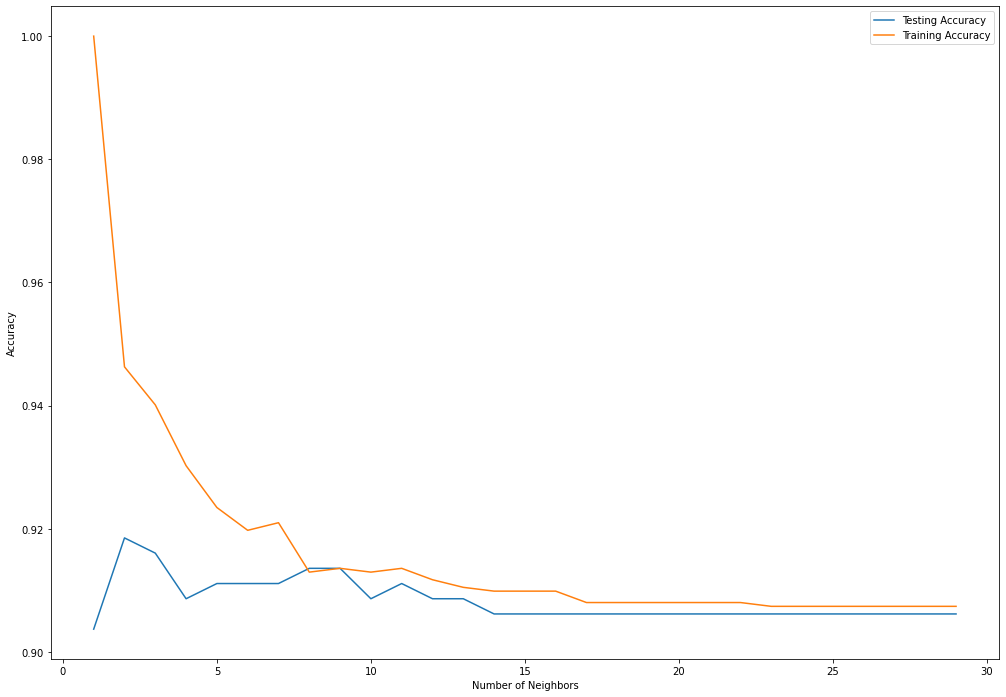

In [53]:
# Initiallize neighbours & accuracy list
neighbours = np.arange(1, 30)
train = []
test = []


# Loop for each 'number of neighbour'
for i, k in enumerate(neighbours):
    
    # Initiallize 'K-Neighbors Classifier'
    KNeighbors_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train 'K-Neighbors Classifier'
    KNeighbors_classifier.fit(X_train,Y_train)
    
    # Calculate 'Training accuracy'
    train.append(KNeighbors_classifier.score(X_train,Y_train))
    
    # Calculate 'Testing accuracy'
    test.append(KNeighbors_classifier.score(X_test,Y_test))
    

# Plotting 'Accuracy' relative to the 'number of neighbours'
plt.figure(figsize=[17,12])
plt.plot(neighbours, test, label = 'Testing Accuracy')
plt.plot(neighbours, train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

One can observe that the model provide a good Testing accuracy for neighbours in the range of **2-4**.
Also the training error is senstive to number of neighbours. The accuracy deteriorates due to the fact that it has to cluster data more accurately.

However, Testing accuracy is not affected much by number of neighbours. This migh be due to good number of outlier that can't adjusted in any way.

In [55]:
KNeighbors_classifier = KNeighborsClassifier(n_neighbors = 3)
KNeighbors_classifier.fit(X_train,Y_train)
KNeighbors_pred = KNeighbors_classifier.predict(X_test)
print('Accuracy: ',KNeighbors_classifier.score(X_test,Y_test))

Accuracy:  0.9160493827160494


## 4. Final Discussion: 

**Objective:**

As mentioned earlier the original objective of data was changed due to unavailability of expected climate data.
Original objective was to analyze the correlation b/w climate features & Economics indicators.
The new objective was to analyze the correlation b/w just Economics indicators. 
Although i still tried to use 'Forests Rent' as proxy of environment conditions in the country.
I know it wasn't the perfect proxy, but it was the best one for which i could find reliable & continuous **data for 45 countries (Year 1975-2019)**.

**Difficulties faced:**

As mentioned earlier, the most difficult part was to assemble the data of 21 features for 45 countries (Year 1975-2019). Assembling & processing the data took most of the time. The effort & time can't be showed in the python notebook. The rest of the work (i.e. finding & training the models) was relatively easier.

**Final Analysis:**

Initially i didn't expected to find any good result from the data-set (as the original objective was changed). But i did find some interesting correlations b/w different economic indicators. These analysis have been mentioned in between the assignment. <br> For example, i found a surprising correlation b/w **1) GDP Growth' & 'Forest rents (% of GDP)' 2) 'Year', 'Health expenditure (% of GDP)'**. This can give some insights to the policy-makers of a country about different evolving aspects of the economy over the years. <br><br>

I was also able to train some accurate models using SVM, Neural Network, K-Neighbors classifier. This can be further used to predict future data. <br><br> 

Honestly, i'm not sure about the last point. There can be number of improvement that can be made to further improve the accuracy & robustness of the models. Due to paucity of time, i could not implement those improvements.<br><br>

For example: <br>
**i) Increase the number of countries, features & years.**<br>
**ii) Induct 'Categorical' features also.**<br>
**iii) Use more complext Neural Network architecture specifically made for Time-Series data.**<br>
**iv) Try to gather data month-wise rather than annually.**<br>
<br><br>
The above mentioned points can be a good starting points for future prognosis of the project.<br>

Thank you.

___
___

## Ethics Issue:  Impact of AI on (un)employment

Let’s imagine you’re living in the age of horse carts. You are running a successful business of horse cart transportation services. Suddenly one day you read a newspaper article stressing the impending **“Automobile Revolution”** that is going to change the world & our planet forever. Now you have 2 options, either to bury your head in the sand like an ostrich & be a total denier OR adapt yourself to place yourself in a position so that you can reap the benefits of the probable upcoming revolutions/changes.

This story has been cyclically repeated in history. It’s a simple logic that one’s who benefits from the status quo would never like to change it. This logic applies to businessmen, politicians, policymakers & every common human being. For example, the same horse cart owner would have felt a lot of insecurities & bad vibes when he read about the proposed ‘Impending Revolution’. He was poised to be biased against that change, even if the change was for the “Greater Common Good” of the society. The policymakers would have gone nuts thinking about the level of unemployment the **“Impending Car/Industrial Revolution”** will cause in the economy. That era’s data scientist would have predicted 20%, 30%, xy%, or more jobs as “Vanished from the economy” & causing a recession. However, if history has to tell something then the reality was totally different. Those entrepreneurs, politicians, policymakers, countries that dared to explore the unknown were rewarded with the fruits of immense wealth & development. The remaining (sitting ducks) were punished with things beyond their control.

The above two articles deal with the key ethical conundrum of Artificial Intelligence in today’s world. Although Ethics in Ai is a vast topic, I’ll like to ponder my article about one of the most critical aspects, i.e. **‘Job Loss’**. 

The main point I stressed in my first two paragraphs is that “Automation” is not a thing of today. In reality, automation has been happening since the times ‘Homosapien’ learned to ignite ‘fire’.
The advent of Automobiles & the Industrial Revolution caused the annihilation of hundreds of industries & professions. But in return, it pioneered Thousands of life-changing industries & created millions of jobs. In the words of great political scientist **Jean-Jacques Rousseau**, Everything was driven in the interest of **“Greater Common Good of the Society”**.

The result was phenomenal, powerful jet engines & airplanes made economical Trans-Atlantic flights possible. New technologies made real-time Trans-Atlantic (in fact whole planet) communications & Broadcasting possible. Thus, the same immigrants who had to leave their homes & loved ones forever. Now those same immigrants can think of visiting their loved ones, once a year. They can think of calling their loved ones.

But there can an easy counter to the above point. The development of these powerfull technologies led to a situation where an army/dictator has the capability to annihilate one whole world, continent, country & race. This was clearly on display during two massive & desctructive world wars in 20th century. Those powerfull jet engines that were suppose to drop tourist were now used to drop bombs on far away lands. The communication & Broadcasting services that were suppose to entertain were now used to terrify community of one religion (i.e. Hatefull propaganda used by Nazis to vilify Jewish people in 20th century). Thus, each coin has two sides, it depends upon which one you look at (i.e. perspective).

Similarly, the revolution of Ai has transformed the life of every Human-being & animal. Crimes rates dropped due to applications of Ai in ‘law enforcement agencies (**LEA**), does that means we no longer require conventional policing? Obviously NO. Police Force & Personals would have to be retrained to tackle some other niche area of Law & Enforcement which is still beyond the scope of Ai. Yes, one can say the levels of police personals won’t be the same as in the past. But then **LEA** is not the only job on this planet. In fact, the Human resources of the country would be re-skilled & re-oriented towards more futuristic & sustainable jobs that would contribute more to the economy in the coming day.

Thus, the idea that nobody would be required to do anything and everything would be done by robots is an extremely ‘False’ notion. First of all, Ai is still not so advance to handle every job on this planet efficiently. And last but not least, even if it (Ai) could, won’t that make the world so awesome & utopian? Human-kind can just sit & watch movies (directed, acted & played using Ai) while eating popcorns (made by a robot). Sounds so good & reminds me of one of my favorite childhood cartoon sitcom, **‘The Jetsons’**.
